## Анализ изображений

В данном примере используется фрагмент набора  данных Cats and Dogs Classification Dataset

В наборе данных два класса: кошки и собаки

Из каждого класса было случайным образом выбрано по 100 изображений (всего 200)

Ссылка: https://www.kaggle.com/datasets/bhavikjikadara/dog-and-cat-classification-dataset

Для работы с изображениями используется библиотека mahotas

Ссылка на оф. документацию: https://mahotas.readthedocs.io/en/latest/

Ссылка на учебник: https://www.tutorialspoint.com/mahotas/index.htm

### Обработка изображений

#### Загрузка и показ изображения

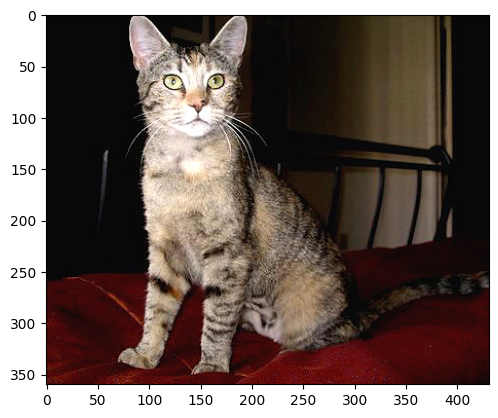

In [1]:
import mahotas as mh
from matplotlib import pyplot as plt
import numpy as np

image = mh.imread("data/images/cat/10000.jpg")
plt.imshow(image)
plt.show()

# Сохранение файла
# mh.imsave("filename.png", image, format=None)

#### Загрузка демо-изображения

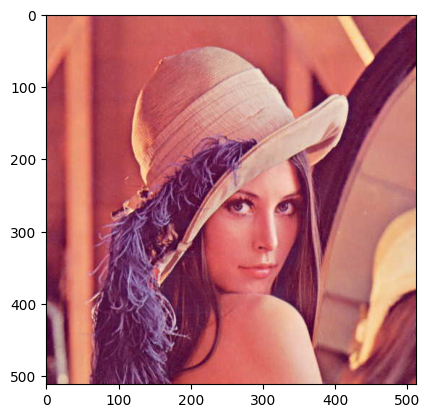

In [2]:
lena = mh.demos.load("lena")
plt.imshow(lena)
plt.show()

#### Получение размера изображения

In [3]:
h, w, _ = image.shape
display(f"{w}x{h}px")

size = image.size
display(size)

'431x360px'

465480

#### Получение фрагмента изображения

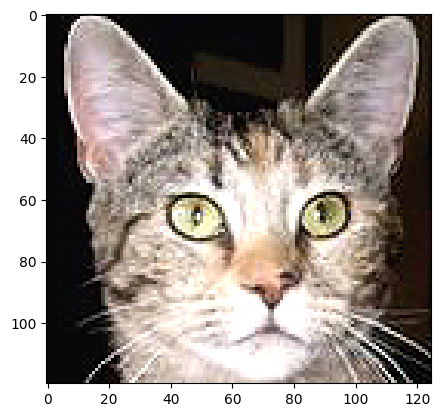

In [4]:
cropped_image = image[0:120, 75:200] # ось Y, ось X
plt.imshow(cropped_image)
plt.show()

#### Изменение размера изображения

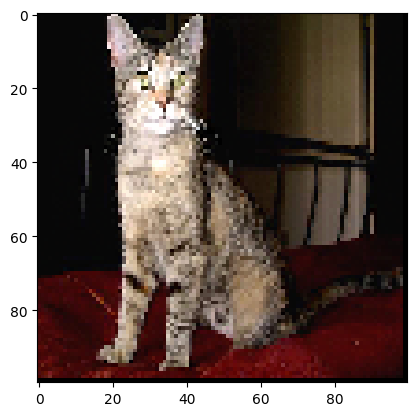

30000

In [5]:
resized = mh.resize.resize_rgb_to(image, (100, 100))

plt.imshow(resized)
plt.show()

display(resized.size)

#### Получение RGB матрицы

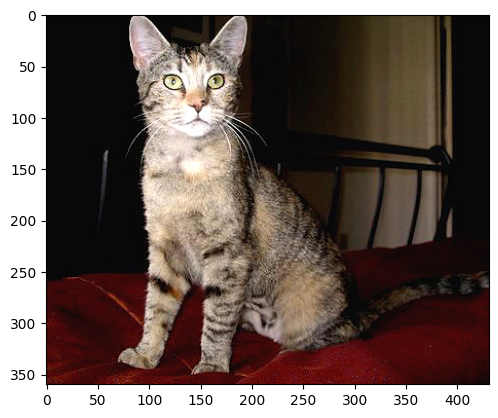

array([[  8,   8,   8, ...,   8,   8,   8],
       [  8,   8,   8, ...,   8,   8,   8],
       [  8,   8,   8, ...,   8,   8,   8],
       ...,
       [ 83,  78,  88, ...,  22,  24,  23],
       [ 92, 110, 106, ...,  17,  17,  17],
       [115,  92,  68, ...,  18,  18,  18]], dtype=uint8)

array([[ 8,  8,  8, ...,  8,  8,  8],
       [ 8,  8,  8, ...,  8,  8,  8],
       [ 8,  8,  8, ...,  8,  8,  8],
       ...,
       [21, 20, 22, ...,  8,  8,  9],
       [30, 42, 40, ...,  8,  8,  8],
       [46, 30,  4, ...,  8,  8,  8]], dtype=uint8)

array([[ 8,  8,  8, ...,  8,  8,  8],
       [ 8,  8,  8, ...,  8,  8,  8],
       [ 8,  8,  8, ...,  8,  8,  8],
       ...,
       [ 6,  8, 10, ...,  8,  9,  9],
       [ 5, 33, 18, ...,  9,  9,  9],
       [13, 15,  4, ...,  9,  9,  9]], dtype=uint8)

In [6]:
plt.imshow(image)
plt.show()

r, g, b = image.transpose((2, 0, 1))
display(r, g, b)

#### Изменение гаммы изображения

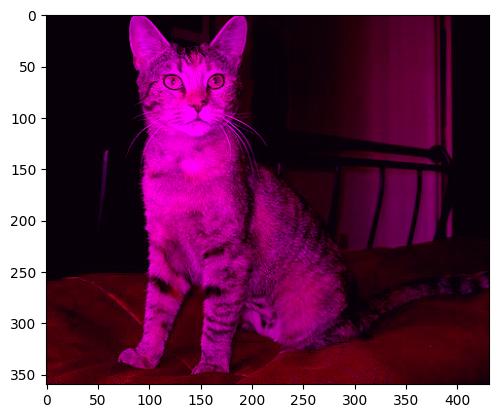

In [7]:
new_greenless_image = mh.as_rgb(r, g * 0, b)
plt.imshow(new_greenless_image)
plt.show()

#### Встроенные методы преобразования гаммы

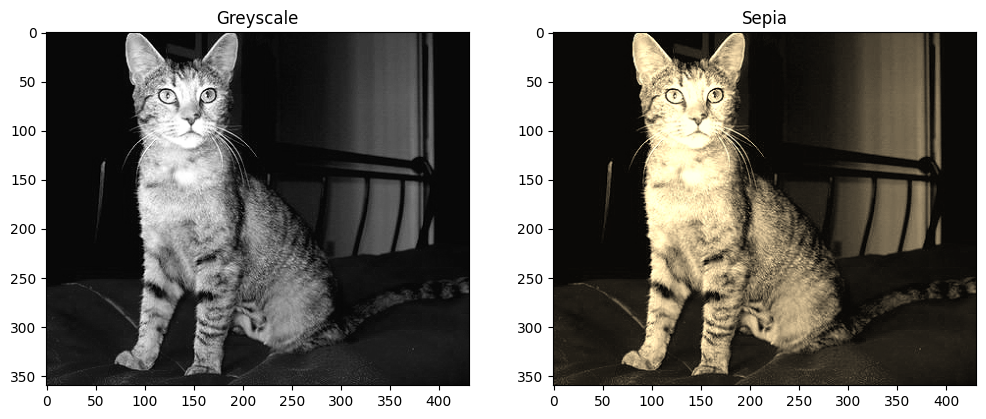

In [8]:
grey_image = mh.colors.rgb2grey(image) # type: ignore

sepia_image = mh.colors.rgb2sepia(image)


fig, axes = plt.subplots(1, 2, figsize=(12, 8))
axes[0].imshow(grey_image, cmap="gray")
axes[0].set_title("Greyscale")
axes[1].imshow(sepia_image)
axes[1].set_title("Sepia")
plt.show()

#### Бинаризация изображения

1. Вычисляется порог
2. Все пикселы > порога заменяются на 1
3. Все пикселы < порога заменяются на 0

'Otsu treshhold = 94'

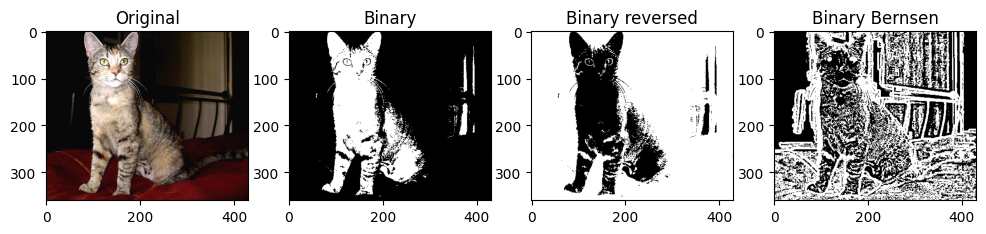

In [9]:
tresh = mh.thresholding.otsu(grey_image.astype("uint8"))
image_bernsen = mh.thresholding.bernsen(grey_image, 5, 200)
display(f"Otsu treshhold = {tresh}")

fig, axes = plt.subplots(1, 4, figsize=(12, 8))
axes[0].imshow(image, cmap="gray")
axes[0].set_title("Original")
axes[1].imshow(grey_image > tresh, cmap="gray")
axes[1].set_title("Binary")
axes[2].imshow(grey_image < tresh, cmap="gray")
axes[2].set_title("Binary reversed")
axes[3].imshow(image_bernsen, cmap="gray")
axes[3].set_title("Binary Bernsen")
plt.show()

#### Изменение контрастности изображения

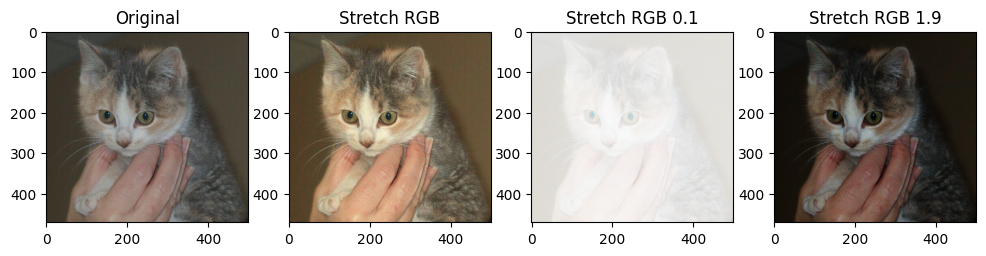

In [10]:
other_image = mh.imread("data/images/cat/10002.jpg")

fig, axes = plt.subplots(1, 4, figsize=(12, 8))
axes[0].imshow(other_image, cmap="gray")
axes[0].set_title("Original")
axes[1].imshow(mh.stretch_rgb(other_image))
axes[1].set_title("Stretch RGB")
axes[2].imshow(mh.stretch(other_image**0.1))
axes[2].set_title("Stretch RGB 0.1")
axes[3].imshow(mh.stretch(other_image**1.9))
axes[3].set_title("Stretch RGB 1.9")
plt.show()

#### Размытие с помощью фильтра Гаусса

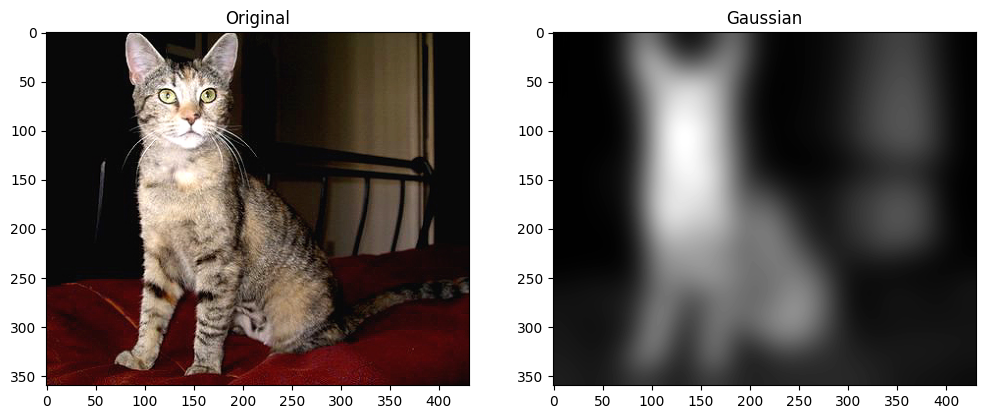

In [11]:
gaussian_image = mh.gaussian_filter(image, 16).astype("uint8")[:, :, 0]

fig, axes = plt.subplots(1, 2, figsize=(12, 8))
axes[0].imshow(image, cmap="gray")
axes[0].set_title("Original")
axes[1].imshow(gaussian_image, cmap="gray")
axes[1].set_title("Gaussian")
plt.show()

#### Выделение маски объекта

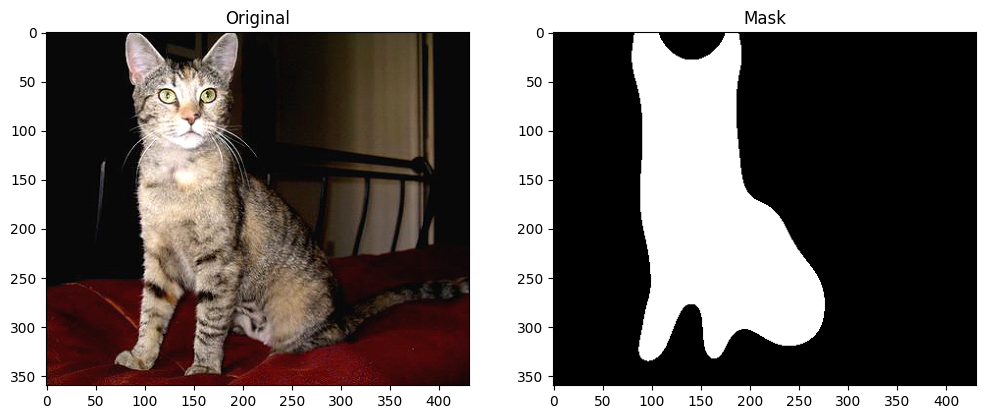

In [12]:
tresh = mh.thresholding.otsu(gaussian_image)
image_mask = (gaussian_image > tresh)

fig, axes = plt.subplots(1, 2, figsize=(12, 8))
axes[0].imshow(image, cmap="gray")
axes[0].set_title("Original")
axes[1].imshow(image_mask, cmap="gray")
axes[1].set_title("Mask")
plt.show()

#### Наложение маски

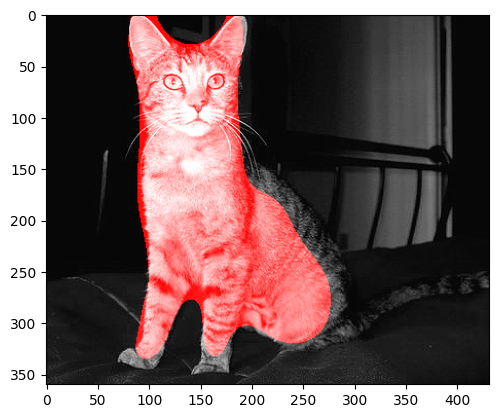

In [13]:
overlay = mh.overlay(mh.colors.rgb2grey(image), image_mask)
plt.imshow(overlay)
plt.show()

#### Выделение объектов на изображении (сегментация)

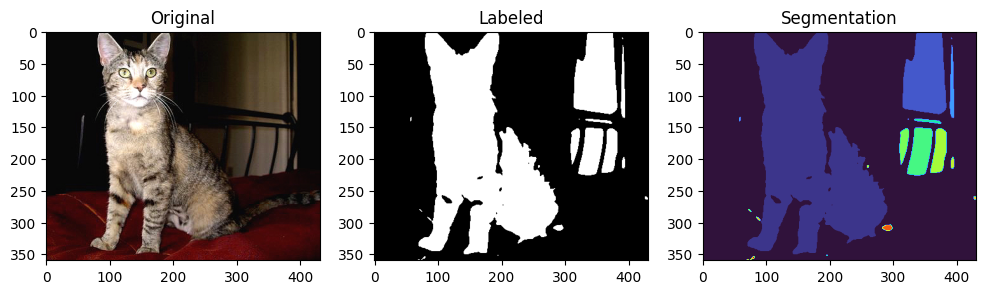

In [14]:
gaussian_image = mh.gaussian_filter(image, 2).astype("uint8")[:, :, 0]
mean_val = gaussian_image.mean()

labeled_image = (gaussian_image > mean_val)

lable, objects = mh.label(labeled_image)

fig, axes = plt.subplots(1, 3, figsize=(12, 8))
axes[0].imshow(image, cmap="gray")
axes[0].set_title("Original")
axes[1].imshow(labeled_image, cmap="gray")
axes[1].set_title("Labeled")
axes[2].imshow(lable, cmap="turbo")
axes[2].set_title("Segmentation")
plt.show()

#### Удаление объектов и выделение границ объектов

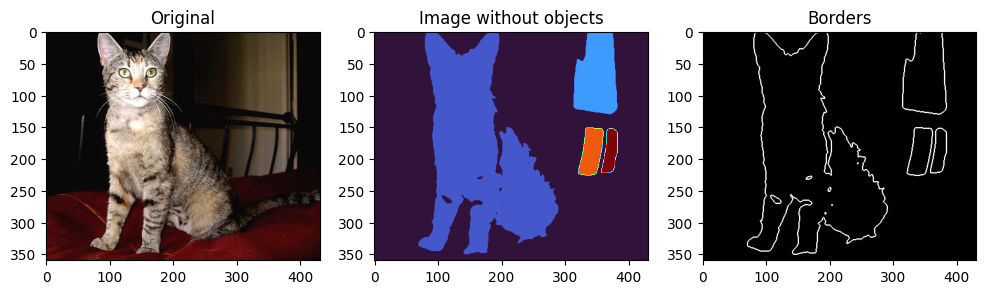

In [15]:
sizes = mh.labeled.labeled_size(lable)
objects_to_remove = np.where(sizes < 1000)

image_without_objects = mh.labeled.remove_regions(lable, objects_to_remove)

border_image = mh.labeled.borders(image_without_objects)

fig, axes = plt.subplots(1, 3, figsize=(12, 8))
axes[0].imshow(image, cmap="gray")
axes[0].set_title("Original")
axes[1].imshow(image_without_objects, cmap="turbo")
axes[1].set_title("Image without objects")
axes[2].imshow(border_image, cmap="gray")
axes[2].set_title("Borders")
plt.show()

#### Выделение границ на основе оператора Собеля

Ссылка: https://ru.wikipedia.org/wiki/Оператор_Собеля

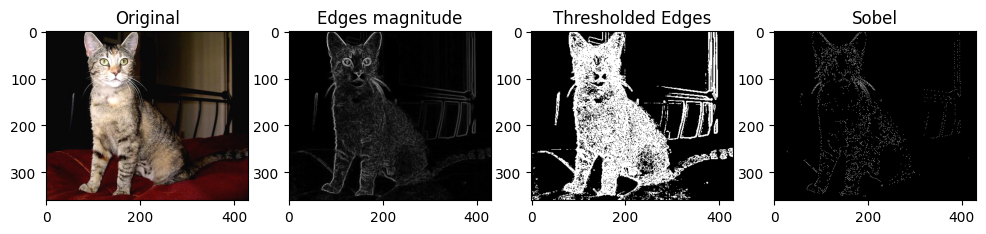

In [16]:
# Горизонтальный фильтр
sobel_horizontal = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
edges_horizontal = mh.convolve(grey_image, sobel_horizontal)

# Вертикальный фильтр
sobel_vertical = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
edges_vertical = mh.convolve(grey_image, sobel_vertical)

edges_magnitude = np.sqrt(edges_horizontal**2 + edges_vertical**2)
threshold = 50
thresholded_edges = edges_magnitude > threshold

sobel = mh.sobel(grey_image)

fig, axes = plt.subplots(1, 4, figsize=(12, 8))
axes[0].imshow(image, cmap="gray")
axes[0].set_title("Original")
axes[1].imshow(edges_magnitude, cmap="gray")
axes[1].set_title("Edges magnitude")
axes[2].imshow(thresholded_edges, cmap="gray")
axes[2].set_title("Thresholded Edges")
axes[3].imshow(sobel, cmap="gray")
axes[3].set_title("Sobel")
plt.show()

#### Локальный максимум и минимум (Local Maxima & Local minima)

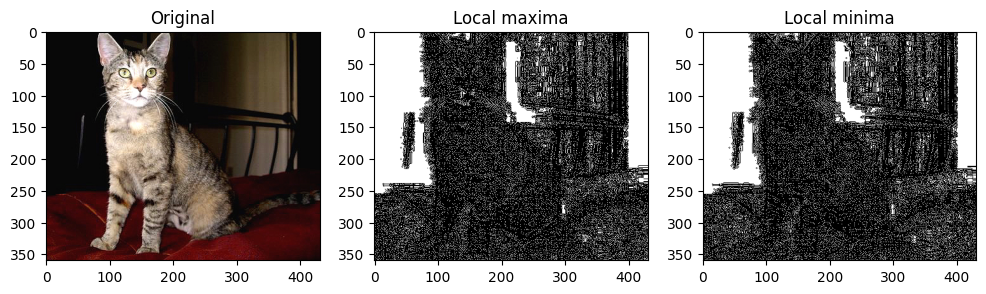

In [17]:
maxima = mh.locmax(grey_image)
minima = mh.locmin(grey_image)

fig, axes = plt.subplots(1, 3, figsize=(12, 8))
axes[0].imshow(image, cmap="gray")
axes[0].set_title("Original")
axes[1].imshow(maxima, cmap="gray")
axes[1].set_title("Local maxima")
axes[2].imshow(minima, cmap="gray")
axes[2].set_title("Local minima")
plt.show()

#### Региональный максимум и минимум (Regional Maxima & Reginal minima)

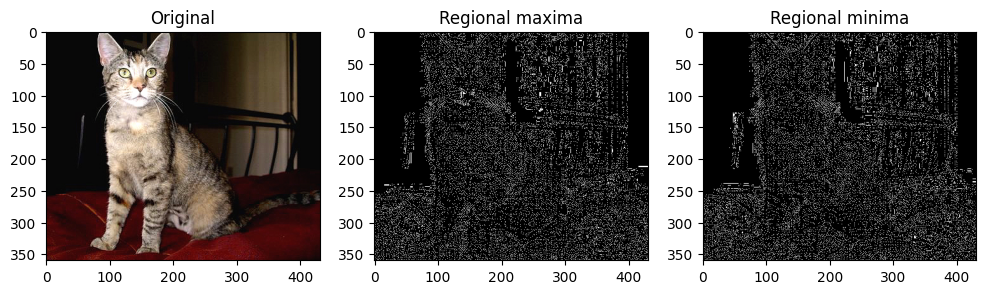

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False,  True],
       [False,  True, False, ..., False, False, False],
       [ True, False, False, ...,  True,  True,  True]])

In [18]:
regmax = mh.regmax(grey_image)
regmin = mh.regmin(grey_image)

fig, axes = plt.subplots(1, 3, figsize=(12, 8))
axes[0].imshow(image, cmap="gray")
axes[0].set_title("Original")
axes[1].imshow(regmax, cmap="gray")
axes[1].set_title("Regional maxima")
axes[2].imshow(regmin, cmap="gray")
axes[2].set_title("Regional minima")
plt.show()

display(regmax)

#### Морфологическая обработка изображений

1. Дилатация (морфологическое расширение) – это свертка изображения или выделенной области изображения с шаблоном. В шаблоне выделяется единственная ведущая позиция (anchor), которая совмещается с текущим пикселем при вычислении свертки. Во многих случаях в качестве шаблона выбирается квадрат или круг с ведущей позицией в центре. Такая операция вызывает рост светлых областей на изображении.

2. Эрозия (морфологическое сужение) – операция, обратная дилатации. Эта операция вызывает уменьшение светлых областей на изображении.

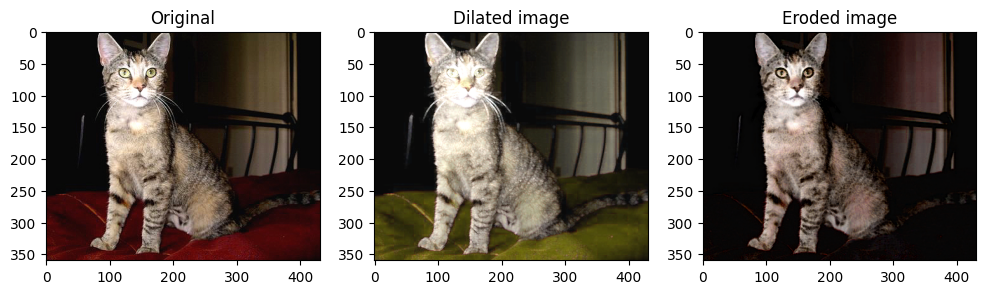

In [19]:
dilate_img = mh.dilate(image)
erode_img = mh.erode(image)

fig, axes = plt.subplots(1, 3, figsize=(12, 8))
axes[0].imshow(image, cmap="gray")
axes[0].set_title("Original")
axes[1].imshow(dilate_img)
axes[1].set_title("Dilated image")
axes[2].imshow(erode_img)
axes[2].set_title("Eroded image")
plt.show()

#### Открытие и закрытие изображений

Открытие - это операция, которая включает в себя сначала вызов оператора эрозии, а после вызывается оператор дилатации над полученным изображение после оператора эрозии.

Закрытие - это операция, которая включает в себя сначала вызов операции дилатации, а после вызывается операция эрозии над полученным изображением после операции дилатации.

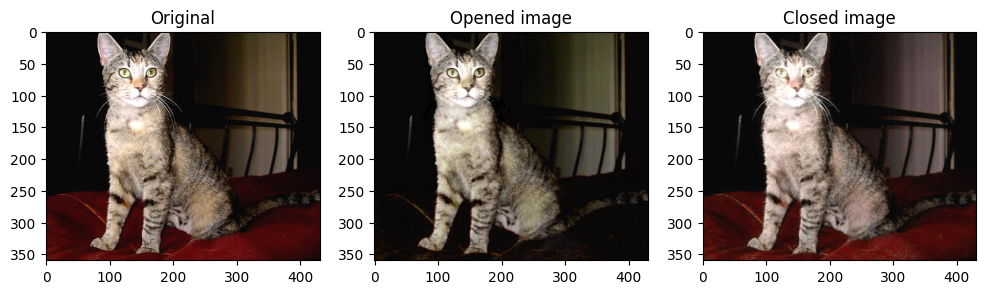

In [20]:
opened_image = mh.open(image)
closed_image = mh.close(image)

fig, axes = plt.subplots(1, 3, figsize=(12, 8))
axes[0].imshow(image, cmap="gray")
axes[0].set_title("Original")
axes[1].imshow(opened_image)
axes[1].set_title("Opened image")
axes[2].imshow(closed_image)
axes[2].set_title("Closed image")
plt.show()

#### Генерация и удаление шумов

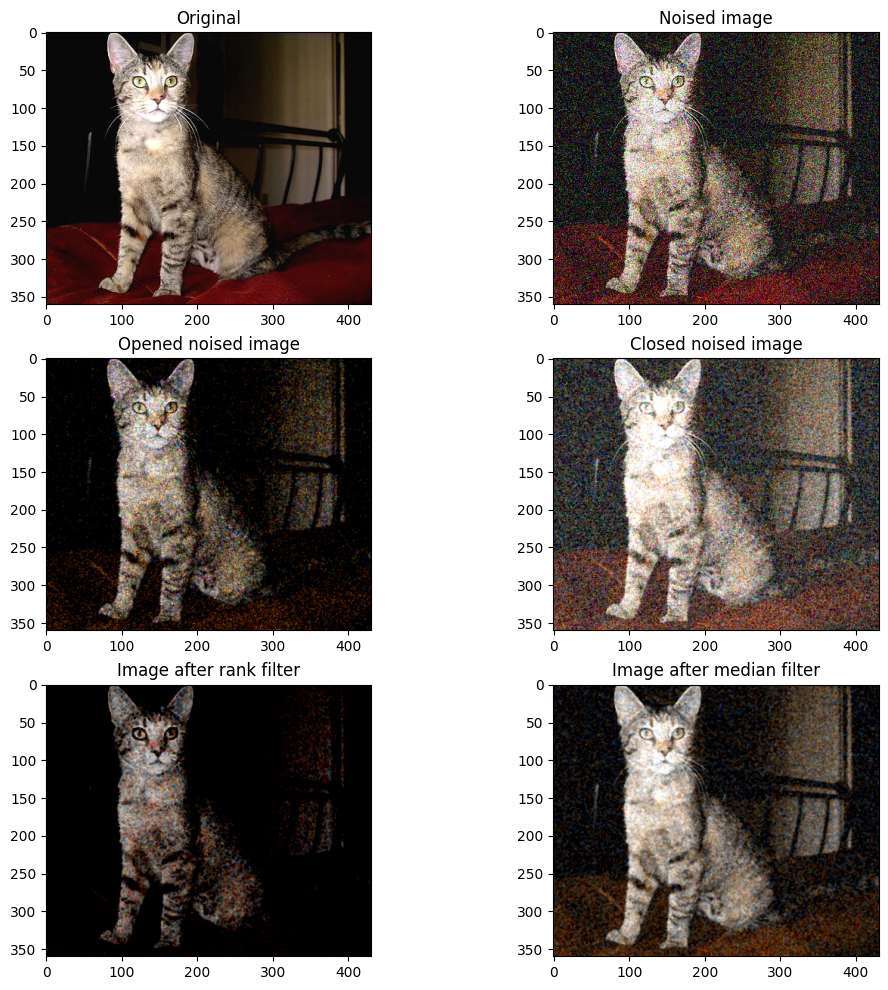

In [21]:
noise_level = 60.0
noise = np.random.normal(0.0, noise_level, image.shape)
noised_image = np.clip((image + noise), 0, 255).astype("uint8")


fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes[0][0].imshow(image, cmap="gray")
axes[0][0].set_title("Original")
axes[0][1].imshow(noised_image)
axes[0][1].set_title("Noised image")
axes[1][0].imshow(mh.open(noised_image))
axes[1][0].set_title("Opened noised image")
axes[1][1].imshow(mh.close(noised_image))
axes[1][1].set_title("Closed noised image")
axes[2][0].imshow(mh.rank_filter(noised_image, 3, 2))
axes[2][0].set_title("Image after rank filter")
axes[2][1].imshow(mh.median_filter(noised_image).astype("uint8"))
axes[2][1].set_title("Image after median filter")
plt.show()

#### Фильтра Лапласа (2D Laplacian Filter)

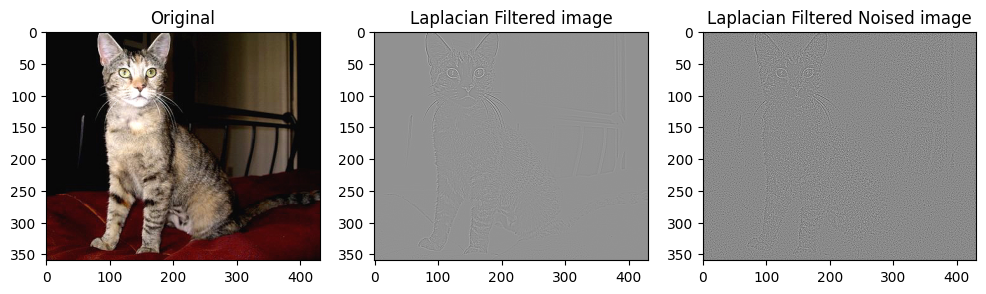

In [22]:
lap_filtered_image = mh.laplacian_2D(grey_image)

fig, axes = plt.subplots(1, 3, figsize=(12, 8))
axes[0].imshow(image, cmap="gray")
axes[0].set_title("Original")
axes[1].imshow(lap_filtered_image, cmap="grey")
axes[1].set_title("Laplacian Filtered image")
axes[2].imshow(mh.laplacian_2D(mh.colors.rgb2grey(noised_image)), cmap="grey")
axes[2].set_title("Laplacian Filtered Noised image")
plt.show()

#### Эксцентриситет и скелет изображения

Эксцентриситет изображения определяет насколько удлинена или растянута форма объекта или области на изображении.

Эта мера дает количественную оценку того, насколько форма отклоняется от идеального круга:
* 0 - указывает на идеальный круг. Объекты с эксцентриситетом 0 имеют наименьшее удлинение и идеально симметричны.
* близко к 1 - указывает на все более удлиненные фигуры. По мере приближения значения эксцентриситета к 1 формы становятся более удлиненными и менее круглыми.

0.5499147747821204

0.0

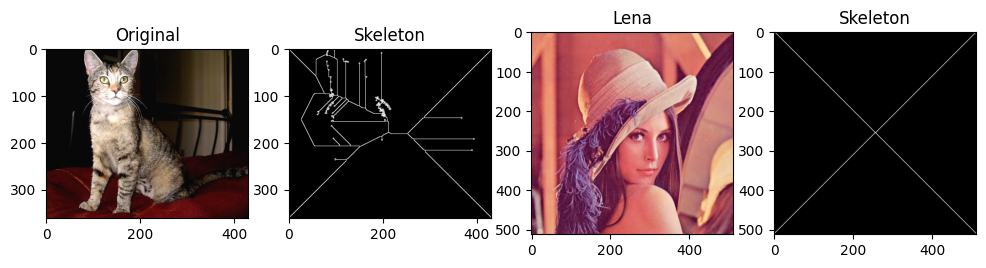

In [23]:
display(mh.features.eccentricity(grey_image))
image_skeleton = mh.thin(grey_image)

display(mh.features.eccentricity(mh.colors.rgb2grey(lena)))
lena_skeleton = mh.thin(mh.colors.rgb2grey(lena))

fig, axes = plt.subplots(1, 4, figsize=(12, 8))
axes[0].imshow(image)
axes[0].set_title("Original")
axes[1].imshow(image_skeleton, cmap="grey")
axes[1].set_title("Skeleton")
axes[2].imshow(lena)
axes[2].set_title("Lena")
axes[3].imshow(lena_skeleton, cmap="grey")
axes[3].set_title("Skeleton")
plt.show()

#### Помещение центра изображения в фокус

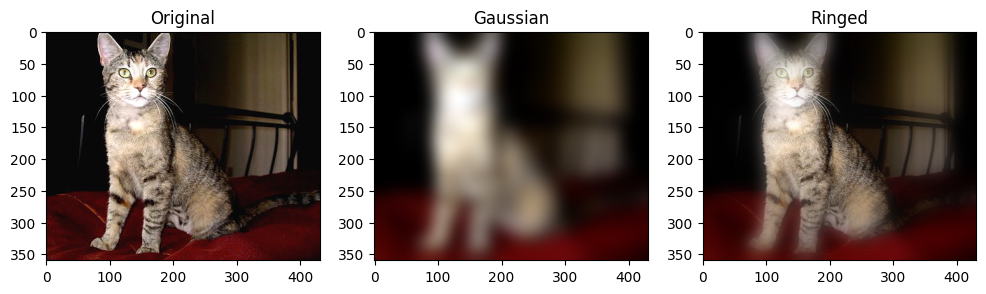

In [24]:
r, g, b = image.transpose((2, 0 ,1))
rg = mh.gaussian_filter(r, 12)
gg = mh.gaussian_filter(g, 12)
bg = mh.gaussian_filter(b, 12)
imageg = mh.as_rgb(rg, gg, bg)

h, w, _ = imageg.shape
Y, X = np.mgrid[:h, :w]
Y = Y - h / 2
Y = Y / Y.max()
X = X - w / 2
X = X / X.max()
C = np.exp(-2 * (X ** 2 + Y ** 2))
C = C - C.min()
C = C / C.ptp()
C = C[:,:, None]
ringed = mh.stretch(image * C + (1 - C) * imageg)

fig, axes = plt.subplots(1, 3, figsize=(12, 8))
axes[0].imshow(image)
axes[0].set_title("Original")
axes[1].imshow(imageg)
axes[1].set_title("Gaussian")
axes[2].imshow(ringed)
axes[2].set_title("Ringed")
plt.show()

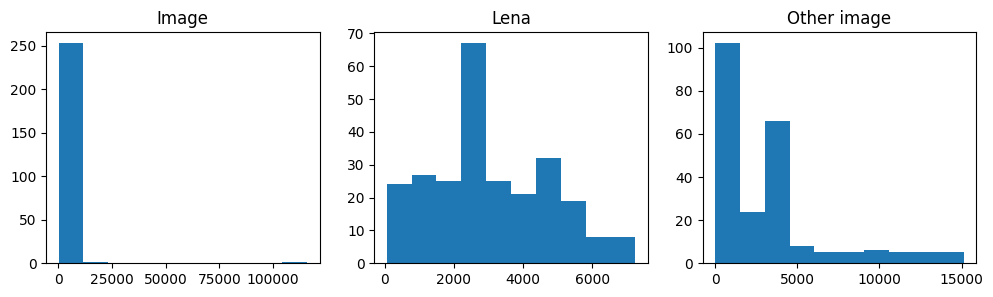

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
axes[0].hist(mh.fullhistogram(image))
axes[0].set_title("Image")
axes[1].hist(mh.fullhistogram(lena))
axes[1].set_title("Lena")
axes[2].hist(mh.fullhistogram(other_image))
axes[2].set_title("Other image")
plt.show()

### Векторизация изображений

#### Векторизация на основе текстуры изображения Харалика (Haralick)

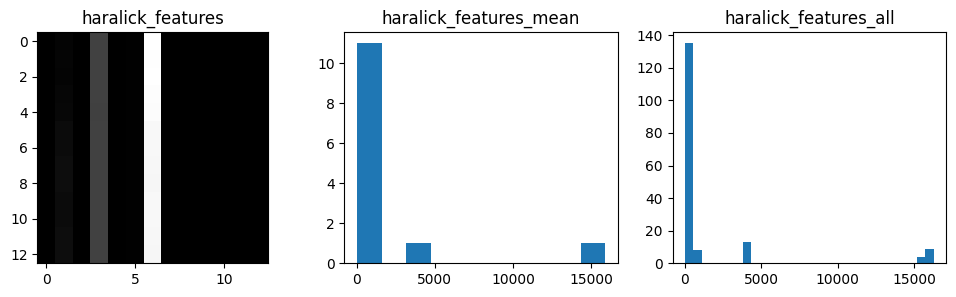

array([[ 4.51374985e-02,  2.62239772e+02,  9.68309961e-01,
         4.13757408e+03,  4.25042316e-01,  1.14436662e+02,
         1.62880566e+04,  7.12827726e+00,  1.03635612e+01,
         5.41640639e-04,  4.00278528e+00, -3.58352357e-01,
         9.94565093e-01],
       [ 4.23880686e-02,  3.73167999e+02,  9.54954991e-01,
         4.14216809e+03,  3.66224919e-01,  1.14638138e+02,
         1.61955044e+04,  7.13987719e+00,  1.06929175e+01,
         4.12940364e-04,  4.37999035e+00, -3.08053040e-01,
         9.89762908e-01],
       [ 4.41665875e-02,  2.91996352e+02,  9.64697672e-01,
         4.13565294e+03,  4.02560404e-01,  1.14470060e+02,
         1.62506154e+04,  7.13427725e+00,  1.04591840e+01,
         4.91771742e-04,  4.10911590e+00, -3.44596708e-01,
         9.93554592e-01],
       [ 4.24564790e-02,  4.19988903e+02,  9.49303240e-01,
         4.14216713e+03,  3.66730679e-01,  1.14638438e+02,
         1.61486796e+04,  7.13840566e+00,  1.07083351e+01,
         4.13141430e-04,  4.40513774e

array([ 4.07802856e-02,  6.34100876e+02,  9.23405032e-01,  4.13889827e+03,
        3.09363066e-01,  1.13238627e+02,  1.59214922e+04,  7.20965926e+00,
        1.09807741e+01,  3.10442918e-04,  4.94976218e+00, -2.47892178e-01,
        9.71242782e-01])

array([ 4.51374985e-02,  2.62239772e+02,  9.68309961e-01,  4.13757408e+03,
        4.25042316e-01,  1.14436662e+02,  1.62880566e+04,  7.12827726e+00,
        1.03635612e+01,  5.41640639e-04,  4.00278528e+00, -3.58352357e-01,
        9.94565093e-01,  4.23880686e-02,  3.73167999e+02,  9.54954991e-01,
        4.14216809e+03,  3.66224919e-01,  1.14638138e+02,  1.61955044e+04,
        7.13987719e+00,  1.06929175e+01,  4.12940364e-04,  4.37999035e+00,
       -3.08053040e-01,  9.89762908e-01,  4.41665875e-02,  2.91996352e+02,
        9.64697672e-01,  4.13565294e+03,  4.02560404e-01,  1.14470060e+02,
        1.62506154e+04,  7.13427725e+00,  1.04591840e+01,  4.91771742e-04,
        4.10911590e+00, -3.44596708e-01,  9.93554592e-01,  4.24564790e-02,
        4.19988903e+02,  9.49303240e-01,  4.14216713e+03,  3.66730679e-01,
        1.14638438e+02,  1.61486796e+04,  7.13840566e+00,  1.07083351e+01,
        4.13141430e-04,  4.40513774e+00, -3.05616146e-01,  9.89441036e-01,
        4.18271415e-02,  

In [26]:
haralick_features = mh.features.haralick(image)
haralick_features_mean = np.mean(haralick_features, axis=0)
haralick_features_all = np.ravel(haralick_features)

fig, axes = plt.subplots(1, 3, figsize=(12, 3))
axes[0].imshow(haralick_features, cmap="grey")
axes[0].set_title("haralick_features")
axes[1].hist(haralick_features_mean)
axes[1].set_title("haralick_features_mean")
axes[2].hist(haralick_features_all, bins=30)
axes[2].set_title("haralick_features_all")
plt.show()

display(haralick_features)
display(haralick_features_mean)
display(haralick_features_all)

#### Векторизация на основе моментов Цернике (Zernike moments)

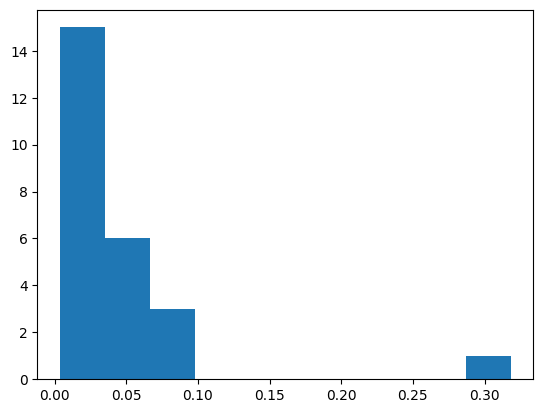

array([0.31830989, 0.06849397, 0.08381497, 0.09008388, 0.04067355,
       0.04584248, 0.05063074, 0.05487106, 0.04094086, 0.03324686,
       0.03100108, 0.01497218, 0.03901264, 0.02602168, 0.03031406,
       0.02074735, 0.0037495 , 0.02869565, 0.02479125, 0.01332455,
       0.03061556, 0.02468736, 0.02209308, 0.00872005, 0.01006026])

In [27]:
radius = 30
moments = mh.features.zernike_moments(mh.stretch(grey_image), radius)

plt.hist(moments)
plt.show()

display(moments)

#### Векторизация на основе LBP (Local Binary Patterns)

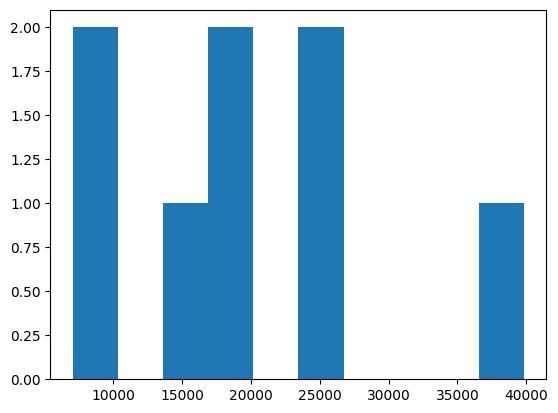

array([39826., 23480., 24550.,  7099., 20123.,  7315., 18757., 14010.])

In [28]:
lbp = mh.features.lbp(grey_image, 5, 5)

plt.hist(lbp)
plt.show()

display(lbp)

#### Векторизация на основе TAS (Threshold Adjacency Statistics)

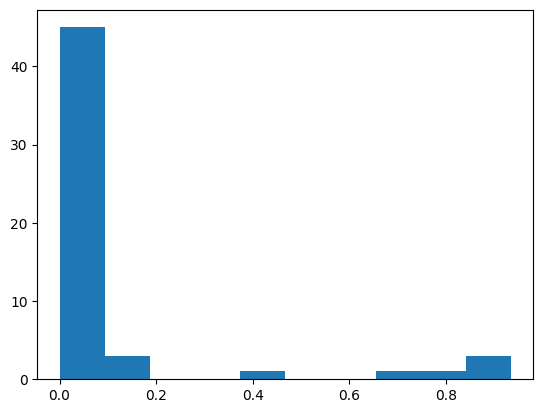

array([8.83138975e-01, 3.54246406e-02, 2.53225000e-02, 2.54493363e-02,
       1.29447665e-02, 8.04291544e-03, 5.25997717e-03, 3.19329110e-03,
       1.22359753e-03, 9.25872574e-01, 1.83775175e-02, 1.40202385e-02,
       1.99253805e-02, 8.90244884e-03, 5.39515242e-03, 3.74887042e-03,
       2.58573640e-03, 1.17208120e-03, 9.33820053e-01, 1.89932762e-02,
       1.43852029e-02, 1.29026054e-02, 8.92764123e-03, 5.09692982e-03,
       3.36589705e-03, 1.69897661e-03, 8.09418101e-04, 3.75360878e-01,
       1.24520801e-01, 1.22012400e-01, 1.38671967e-01, 9.27161721e-02,
       6.41771972e-02, 4.61924369e-02, 2.63145440e-02, 1.00336031e-02,
       7.84458323e-01, 6.86977162e-02, 4.41776323e-02, 5.10450994e-02,
       2.49348973e-02, 1.29974881e-02, 8.50367571e-03, 3.98681815e-03,
       1.19834996e-03, 7.22439843e-01, 8.47625004e-02, 5.68813983e-02,
       5.68813983e-02, 3.52216992e-02, 2.06063399e-02, 1.32328253e-02,
       7.34059712e-03, 2.63339807e-03])

In [29]:
tas = mh.features.tas(grey_image)

plt.hist(tas)
plt.show()

display(tas)

#### Векторизация на основе локальных признаков SURF

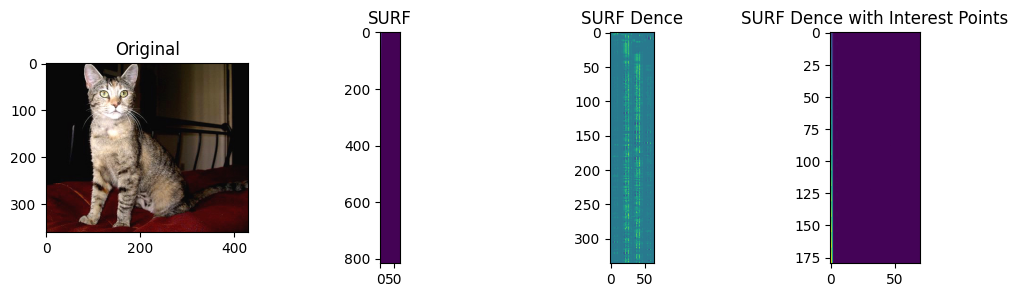

array([[ 7.28873225e+01,  1.31698490e+02,  1.92185808e+00, ...,
        -1.14868732e-03,  2.70839583e-03,  3.79896228e-03],
       [ 2.66545079e+02,  1.14141663e+02,  3.67261333e+00, ...,
         1.83683756e-02,  7.16534985e-03,  1.83683756e-02],
       [ 2.48864039e+02,  1.04419521e+02,  2.54755547e+00, ...,
        -1.80264090e-03,  1.64471541e-03,  1.80264090e-03],
       ...,
       [ 2.08055857e+02,  5.58947788e+01,  2.00210665e+00, ...,
         3.85490737e-15,  1.65970597e-14,  2.27060096e-14],
       [ 7.95381118e+01,  3.58798489e+02,  4.39319702e+00, ...,
        -7.66265591e-03,  1.05325594e-02,  7.66265591e-03],
       [ 9.96912724e+01,  3.51096905e+02,  3.61716300e+00, ...,
        -4.20756362e-03,  7.86288115e-03,  6.65495248e-03]])

array([[ 6.50637256e-02, -4.19827975e-03,  6.52505885e-02, ...,
        -4.38712735e-16,  1.01071616e-15,  8.14648798e-16],
       [ 3.88440497e-02,  4.67547358e-04,  3.90400258e-02, ...,
        -6.24841125e-16,  1.97077574e-15,  1.68527456e-15],
       [ 6.53868197e-03, -2.45087385e-03,  6.55277535e-03, ...,
        -1.01797465e-02,  1.85116417e-02,  1.47010409e-02],
       ...,
       [-7.96519992e-05,  1.06983803e-04,  4.52748410e-04, ...,
        -3.78945691e-03,  8.12006142e-03,  4.68956016e-03],
       [ 1.30095717e-03, -5.53197839e-04,  1.43637675e-03, ...,
         1.80592590e-05,  2.76791183e-03,  1.59742578e-03],
       [-2.26276215e-04,  2.26709158e-04,  1.25239297e-03, ...,
         1.58267589e-02,  3.57621219e-02,  1.63138579e-02]])

array([[ 7.00000000e+01,  7.00000000e+01,  4.47213595e+00, ...,
        -1.78282797e-03,  1.20636218e-03,  1.78282797e-03],
       [ 9.00000000e+01,  7.00000000e+01,  4.47213595e+00, ...,
        -3.15068548e-03,  2.31305455e-03,  3.15068548e-03],
       [ 1.10000000e+02,  7.00000000e+01,  4.47213595e+00, ...,
        -1.95665901e-03,  2.68671915e-03,  1.95665901e-03],
       ...,
       [ 2.50000000e+02,  3.50000000e+02,  4.47213595e+00, ...,
         3.14040232e-02,  3.46588966e-02,  3.53307601e-02],
       [ 2.70000000e+02,  3.50000000e+02,  4.47213595e+00, ...,
         3.17343898e-03,  4.54835300e-03,  3.17584389e-03],
       [ 2.90000000e+02,  3.50000000e+02,  4.47213595e+00, ...,
        -6.78272162e-03,  1.03749262e-02,  6.78272162e-03]])

In [30]:
from mahotas.features import surf

surf_surf = surf.surf(grey_image)
surf_dence = surf.dense(grey_image, 15)
surf_dence_points = surf.dense(grey_image, 20, include_interest_point=True)

fig, axes = plt.subplots(1, 4, figsize=(12, 3))
axes[0].imshow(image)
axes[0].set_title("Original")
axes[1].imshow(surf_surf)
axes[1].set_title("SURF")
axes[2].imshow(surf_dence)
axes[2].set_title("SURF Dence")
axes[3].imshow(surf_dence_points)
axes[3].set_title("SURF Dence with Interest Points")
plt.show()

display(surf_surf)
display(surf_dence)
display(surf_dence_points)

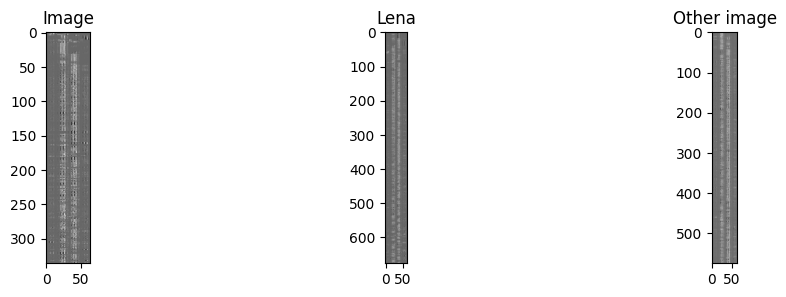

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
axes[0].imshow(surf.dense(grey_image, 15), cmap="grey")
axes[0].set_title("Image")
axes[1].imshow(surf.dense(mh.colors.rgb2grey(lena), 15), cmap="grey")
axes[1].set_title("Lena")
axes[2].imshow(surf.dense(mh.colors.rgb2grey(other_image), 15), cmap="grey")
axes[2].set_title("Other image")
plt.show()

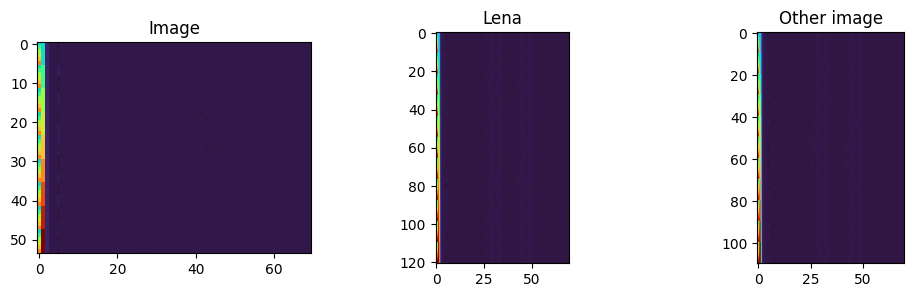

In [38]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
axes[0].imshow(surf.dense(grey_image, 30, include_interest_point=True), cmap="turbo")
axes[0].set_title("Image")
axes[1].imshow(surf.dense(mh.colors.rgb2grey(lena), 30, include_interest_point=True), cmap="turbo")
axes[1].set_title("Lena")
axes[2].imshow(surf.dense(mh.colors.rgb2grey(other_image), 30, include_interest_point=True), cmap="turbo")
axes[2].set_title("Other image")
plt.show()

#### Векторизация на основе гистограммы цветов

In [32]:
def get_hist(image):
    image = image // 64
    r, g, b = image.transpose((2, 0, 1))
    pixels = 1 * r + 4 * b + 16 * g
    hist = np.bincount(pixels.ravel(), minlength=64)
    hist = hist.astype("float")
    return np.log1p(hist)

hist = get_hist(image)
display(hist)

array([11.34631583,  9.91625569,  4.4543473 ,  0.        ,  2.30258509,
        2.77258872,  1.09861229,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  2.19722458,  9.17481682,  4.38202663,  0.        ,
        0.        ,  9.29835125,  8.47886808,  0.        ,  0.        ,
        0.        ,  2.19722458,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.69314718,  8.53346016,  3.40119738,
        0.        ,  0.        ,  8.80657382,  8.30745933,  0.        ,
        0.        ,  0.        ,  4.24849524,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.69314718,  0.        ,  0.        ,  1.09861229,  8.03947992,
        0.        ,  0.        ,  0.        ,  8.64011854])

### Пример классификации изображений

#### Загрузка и векторизация изображений

In [33]:
from glob import glob
import pandas as pd

df = pd.DataFrame(columns=["img", "features", "label"])

labels = {"cat": 0, "dog": 1}

path = "data/images/"
images = glob(f"{path}*/*.jpg")
features = []
descriptors = []
for img_file in images:
    img = mh.imread(img_file)
    img_grey = mh.colors.rgb2grey(img)  # type: ignore
    haralick = mh.features.haralick(img_grey.astype("uint8")).ravel()
    hist = get_hist(img)
    ssurf = surf.surf(img_grey)
    dense = surf.dense(img_grey, 12)
    feature = np.concatenate([
        haralick,
        hist,
        np.mean(ssurf, axis=0),
        np.mean(dense, axis=0),
    ])
    df.loc[len(df.index)] = [
        img_file.replace(path, ""),
        feature,
        labels[img_file[12:15]],
    ]

display(df.info())
df

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   img       200 non-null    object
 1   features  200 non-null    object
 2   label     200 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 6.2+ KB


None

img                                           features  label
0    cat/10057.jpg  [0.0016804580279478885, 36.73806042296073, 0.9...      0
1    cat/10043.jpg  [0.0008844410838415247, 291.8222095296244, 0.8...      0
2    cat/10080.jpg  [0.0005097805741091919, 117.98748505656849, 0....      0
3    cat/10081.jpg  [0.0005428144665070902, 108.13674054696219, 0....      0
4    cat/10042.jpg  [0.0017261571469478782, 82.87656739811908, 0.9...      0
..             ...                                                ...    ...
195  dog/10067.jpg  [0.00043322374640936297, 117.43184319458592, 0...      1
196  dog/10066.jpg  [0.00024269852017551422, 156.4120774883099, 0....      1
197  dog/10072.jpg  [0.0005322341713040898, 693.4945731462927, 0.9...      1
198   dog/1000.jpg  [0.0010142373261329257, 106.54851035404141, 0....      1
199      dog/0.jpg  [0.0003647695337234279, 180.7958957915833, 0.9...      1

[200 rows x 3 columns]

#### Классификация изображений

In [34]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline


model_lr = Pipeline([
    ("preprocessing", StandardScaler()),
    ("classifier", LogisticRegression()),
])

model_rf = Pipeline([
    ("preprocessing", StandardScaler()),
    ("classifier", RandomForestClassifier(n_estimators=500)),
])

model_mlp = Pipeline([
    ("preprocessing", StandardScaler()),
    ("classifier", MLPClassifier(hidden_layer_sizes=(100,), activation='logistic', max_iter=1000)),
])

models = {
    "LogisticRegression": model_lr,
    "RandomForestClassifier": model_rf,
    "MLPClassifier": model_mlp,
}

for name, model in models.items():
    cv = KFold(5, shuffle=True, random_state=9)
    score = cross_val_score(model, list(df["features"]), df["label"], cv=cv, scoring="f1")  # type: ignore
    display(name, score.mean())

'LogisticRegression'

0.6364393939393939

'RandomForestClassifier'

0.6336501135281624

'MLPClassifier'

0.6108666299500773